In [1]:
!echo "https://noteable.edina.ac.uk/user/$(jupyter notebook list | grep -oP '(?<=user\/).*(?=\/\?)' )/tree?token=$( jupyter notebook list | grep -oP '(?<=token=).*(?= ::)' )"

https://noteable.edina.ac.uk/user/3ysdxkhlyyhduqruuznh6k/tree?token=LAeYprfJSrSoOKPQsF-p5g


In [2]:
#load libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from bokeh.io import push_notebook, show, output_notebook
from bokeh.plotting import figure
import plotly.express as px

plt.style.use('ggplot')

plt.rc('font', size=10) #controls default text size
plt.rc('axes', titlesize=12) #fontsize of the title
plt.rc('axes', labelsize=10) #fontsize of the x and y labels
plt.rc('xtick', labelsize=10) #fontsize of the x tick labels
plt.rc('ytick', labelsize=10) #fontsize of the y tick labels
plt.rc('legend', fontsize=10) #fontsize of the legend

In [3]:
#importing the data
dataset = pd.read_csv('https://www.inf.ed.ac.uk/teaching/courses/fds/data/project-2021-2022/spotify/data.csv.zip')
print(dataset.dtypes)
print(dataset)
dataset.drop('URL',inplace=True,axis=1) #dropping the url column
#changing the data type of time
dataset['Date'] = pd.to_datetime(dataset['Date'])
#print the datatypes


Position       int64
Track Name    object
Artist        object
Streams        int64
URL           object
Date          object
Region        object
dtype: object
         Position                  Track Name              Artist  Streams  \
0               1  Reggaetón Lento (Bailemos)                CNCO    19272   
1               2                    Chantaje             Shakira    19270   
2               3   Otra Vez (feat. J Balvin)       Zion & Lennox    15761   
3               4                Vente Pa' Ca        Ricky Martin    14954   
4               5                      Safari            J Balvin    14269   
...           ...                         ...                 ...      ...   
3441192       196          More Than You Know  Axwell /\ Ingrosso     2126   
3441193       197                      Issues      Julia Michaels     2117   
3441194       198                 Tuo Fei Lun          Eason Chan     2112   
3441195       199                          面具          Alfr

In [4]:
# Get summary statistics
display(dataset['Streams'].describe())

count    3.441197e+06
mean     5.189176e+04
std      2.018035e+05
min      1.001000e+03
25%      3.322000e+03
50%      9.227000e+03
75%      2.965800e+04
max      1.138152e+07
Name: Streams, dtype: float64

In [5]:
#finding  if there is null values in track name
dataset['Track Name'].isna().value_counts()/dataset.shape[0]* 100
#99.98 of the data doesnt contain null values of track name

False    99.980908
True      0.019092
Name: Track Name, dtype: float64

In [6]:
#finding  if there is null values in track name
dataset.Artist.isna().value_counts()/dataset.shape[0]* 100
#drop null values
dataset = dataset.dropna(axis=0)

In [7]:
#finding the dates the data covers
print('First Day:', dataset['Date'].min(), '\n Last Day:', dataset['Date'].max(), "\nTotal Duration:", dataset['Date'].max() - dataset['Date'].min())

First Day: 2017-01-01 00:00:00 
 Last Day: 2018-01-09 00:00:00 
Total Duration: 373 days 00:00:00


In [8]:
#just look at 2017 data
dataset = dataset[dataset['Date']< '2018']
#seperating the data from global to by country
globalDataset = dataset[dataset.Region == 'global']
regionalDataset = dataset[dataset.Region != 'global']
print(dataset)

         Position                  Track Name             Artist  Streams  \
0               1  Reggaetón Lento (Bailemos)               CNCO    19272   
1               2                    Chantaje            Shakira    19270   
2               3   Otra Vez (feat. J Balvin)      Zion & Lennox    15761   
3               4                Vente Pa' Ca       Ricky Martin    14954   
4               5                      Safari           J Balvin    14269   
...           ...                         ...                ...      ...   
3439392       196                      說好的幸福呢           Jay Chou     1949   
3439393       197                          心淡          Joey Yung     1942   
3439394       198               One Call Away       Charlie Puth     1938   
3439395       199                         New               Daya     1922   
3439396       200             Pumped Up Kicks  Foster The People     1912   

              Date Region  
0       2017-01-01     ec  
1       2017-01-01 

In [9]:
#get most streamed song over the whole year in one day
dataset.sort_values('Streams', ascending=False).iloc[0]

Position                                       1
Track Name    Despacito (Featuring Daddy Yankee)
Artist                                Luis Fonsi
Streams                                 11381520
Date                         2017-05-27 00:00:00
Region                                    global
Name: 3145443, dtype: object

In [10]:
print(len(regionalDataset['Region'].unique()))

53


In [11]:
#Regions
Europe = ["fr","fi","no","it","lt","ee","tr","de","ch","hu","be","dk","pl","at","pt","se","is","es","cz","ie","nl","sk","lu","gb","gr","lv"]
NorthAmerica = ["us","ca","mx","do","hn","sv","cr","gt","pa"]
SouthAmerica = ["ec","ar","cl","br","pe","bo","uy","co","py"]
Asia=["hk","ph","tw","jp","my","sg","id"]
Oceania = ["nz","au"]

#creating a data set for all continents   
EuropeDf = dataset[dataset['Region'].isin (Europe)]
NorthAmericaDf = dataset[dataset['Region'].isin (NorthAmerica)]
SouthAmericaDf = dataset[dataset['Region'].isin (SouthAmerica)]
AsiaDf = dataset[dataset['Region'].isin (Asia)]
OceaniaDf = dataset[dataset['Region'].isin (Oceania)]
GlobalDf = dataset[dataset['Region'] == "global"]

English = ["gb", "ie", "us", "nz", "au", "ca"]
Spanish = ["cr", "cl", "co", "ar", "do", "ec", "sv", "gt", "hn", "mx", "pa", "pe", "py", "uy"]


#creating a dataset for countries which share the same official language
EnglishDf = dataset[dataset['Region'].isin (English)]
SpanishDf = dataset[dataset['Region'].isin (Spanish)]

#find no1 of each region

#pycountry - translates country codes into country names

In [12]:
#get total number of streams for each continent
europeStreams=sum(EuropeDf['Streams'])
northAmericaStreams=sum(NorthAmericaDf['Streams'])
southAmericaStreams=sum(SouthAmericaDf['Streams'])
asiaStreams=sum(AsiaDf['Streams'])
oceaniaStreams=sum(OceaniaDf['Streams'])
globalStreams=sum(GlobalDf['Streams'])
print(europeStreams)
print(northAmericaStreams)
print(southAmericaStreams)
print(asiaStreams)
print(oceaniaStreams)
print(globalStreams)


38087939945
36038877978
14103910101
6896122177
4076673189
75021041432


In [13]:
#get the top song for each region
europeTopSongs=EuropeDf.groupby(['Track Name']).sum()
europeTopSongs=europeTopSongs.sort_values(by=['Streams'],ascending=False).iloc[:100]
europeTopSongs['Continent']="EU"
#print(europeTopSongs)
northAmericaTopSongs=NorthAmericaDf.groupby(['Track Name']).sum()
northAmericaTopSongs=northAmericaTopSongs.sort_values(by=['Streams'],ascending=False).iloc[:100]
northAmericaTopSongs['Continent']="NA"
#print(northAmericaTopSongs)
southAmericaTopSongs=SouthAmericaDf.groupby(['Track Name']).sum()
southAmericaTopSongs=southAmericaTopSongs.sort_values(by=['Streams'],ascending=False).iloc[:100]
southAmericaTopSongs['Continent']="SA"
#print(southAmericaTopSongs)
asiaTopSongs=AsiaDf.groupby(['Track Name']).sum()
asiaTopSongs=asiaTopSongs.sort_values(by=['Streams'],ascending=False).iloc[:100]
asiaTopSongs['Continent']="AS"
#print(asiaTopSongs)
oceaniaTopSongs=OceaniaDf.groupby(['Track Name']).sum()
oceaniaTopSongs=oceaniaTopSongs.sort_values(by=['Streams'],ascending=False).iloc[:100]
oceaniaTopSongs['Continent']="OC"
#print(oceaniaTopSongs)

globalTopSongs=GlobalDf.groupby(['Track Name']).sum()
globalTopSongs=globalTopSongs.sort_values(by=['Streams'],ascending=False).iloc[:100]
#print(globalTopSongs)

allTopSongs=pd.concat([europeTopSongs,northAmericaTopSongs,southAmericaTopSongs,asiaTopSongs,oceaniaTopSongs])

In [14]:
allTopSongs.drop('Position',inplace=True,axis=1)


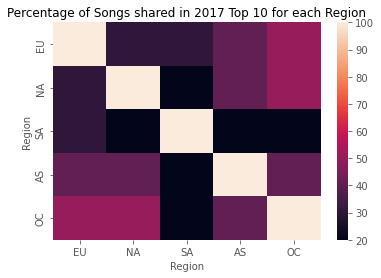

In [15]:
data =  [[100,30,30,40,50],[30,100,20,40,50],[30,20,100,20,20],[40,40,20,100,40],[50,50,20,40,100]]
xtick =['EU','NA','SA','AS','OC']
ytick =['EU','NA','SA','AS','OC']
sns.heatmap(data,xticklabels = xtick, yticklabels=ytick)
plt.xlabel("Region")
plt.ylabel("Region")
plt.title("Percentage of Songs shared in 2017 Top 10 for each Region")
plt.savefig("songsSharedTop10heatMap.png",dpi=900,bbox_inches='tight')


[100, 53, 28, 62, 70]
[53, 100, 27, 44, 58]
[28, 27, 100, 25, 22]
[62, 44, 25, 100, 63]
[70, 58, 22, 63, 100]


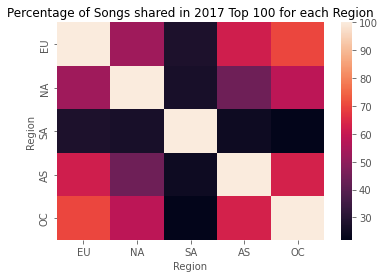

In [16]:
xtick =['EU','NA','SA','AS','OC']
ytick =['EU','NA','SA','AS','OC']
continents=[europeTopSongs,northAmericaTopSongs,southAmericaTopSongs,asiaTopSongs,oceaniaTopSongs]

europeVal=[0]*5
for i in range(0,5):
    occurences=0
    for k in range(0,100):
        for l in range(0,100):
            if europeTopSongs.index[k] == continents[i].index[l]:
                occurences = occurences + 1
    europeVal[i] = occurences
print(europeVal)

northAmericaVal=[0]*5
for i in range(0,5):
    occurences=0
    for k in range(0,100):
        for l in range(0,100):
            if northAmericaTopSongs.index[k] == continents[i].index[l]:
                occurences = occurences + 1
    northAmericaVal[i] = occurences
print(northAmericaVal)
    
southAmericaVal=[0]*5
for i in range(0,5):
    occurences=0
    for k in range(0,100):
        for l in range(0,100):
            if southAmericaTopSongs.index[k] == continents[i].index[l]:
                occurences = occurences + 1
    southAmericaVal[i] = occurences
print(southAmericaVal)

asiaVal=[0]*5
for i in range(0,5):
    occurences=0
    for k in range(0,100):
        for l in range(0,100):
            if asiaTopSongs.index[k] == continents[i].index[l]:
                occurences = occurences + 1
    asiaVal[i] = occurences
print(asiaVal)

oceaniaVal=[0]*5
for i in range(0,5):
    occurences=0
    for k in range(0,100):
        for l in range(0,100):
            if oceaniaTopSongs.index[k] == continents[i].index[l]:
                occurences = occurences + 1
    oceaniaVal[i] = occurences
print(oceaniaVal)

heatdata=[europeVal,northAmericaVal,southAmericaVal,asiaVal,oceaniaVal]
sns.heatmap(heatdata,xticklabels = xtick, yticklabels=ytick)
plt.xlabel("Region")
plt.ylabel("Region")
plt.title("Percentage of Songs shared in 2017 Top 100 for each Region")
plt.savefig("songsSharedTop100heatMap.png",dpi=900,bbox_inches='tight')

[100, 83, 44, 65, 63, 56, 29, 27, 10, 21, 12, 21, 19, 27, 21, 24, 24, 26, 17, 14, 13]
[83, 100, 45, 71, 70, 60, 31, 27, 10, 21, 12, 21, 19, 27, 21, 24, 24, 26, 17, 14, 13]
[44, 45, 100, 56, 53, 75, 21, 25, 10, 19, 11, 19, 18, 25, 19, 23, 22, 23, 16, 12, 11]
[65, 71, 56, 100, 84, 72, 28, 30, 11, 22, 13, 21, 21, 28, 21, 25, 25, 26, 18, 14, 13]
[63, 70, 53, 84, 100, 72, 30, 28, 11, 22, 13, 22, 20, 29, 22, 25, 24, 27, 18, 15, 14]
[56, 60, 75, 72, 72, 100, 30, 28, 12, 23, 14, 23, 21, 29, 23, 26, 25, 28, 19, 16, 15]
[29, 31, 21, 28, 30, 30, 100, 62, 58, 62, 63, 56, 68, 68, 69, 62, 65, 70, 65, 62, 66]
[27, 27, 25, 30, 28, 28, 62, 100, 62, 73, 63, 66, 75, 77, 78, 75, 73, 74, 72, 66, 61]
[10, 10, 10, 11, 11, 12, 58, 62, 100, 68, 82, 68, 76, 73, 75, 73, 69, 76, 81, 72, 76]
[21, 21, 19, 22, 22, 23, 62, 73, 68, 100, 67, 65, 84, 76, 78, 74, 68, 78, 75, 67, 68]
[12, 12, 11, 13, 13, 14, 63, 63, 82, 67, 100, 65, 76, 72, 76, 69, 67, 75, 80, 76, 90]
[21, 21, 19, 21, 22, 23, 56, 66, 68, 65, 65, 100, 64, 

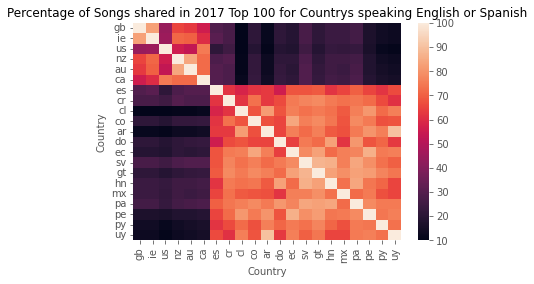

In [17]:
xtick = ["gb", "ie", "us", "nz", "au", "ca","cr", "cl", "co", "ar", "do", "ec", "sv", "gt", "hn", "mx", "pa", "pe", "py", "uy"]
xtick = ["gb", "ie", "us", "nz", "au", "ca","cr", "cl", "co", "ar", "do", "ec", "sv", "gt", "hn", "mx", "pa", "pe", "py", "uy"]
len(xtick)
English = ["gb", "ie", "us", "nz", "au", "ca"]
Spanish = ["cr", "cl", "co", "ar", "do", "ec", "sv", "gt", "hn", "mx", "pa", "pe", "py", "uy"]

langs = ["gb", "ie", "us", "nz", "au", "ca","es","cr", "cl", "co", "ar", "do", "ec", "sv", "gt", "hn", "mx", 
         "pa", "pe", "py", "uy"]

s={}
for i in range(0,len(langs)):
    temp=regionalDataset[regionalDataset['Region']==langs[i]]
    temp=temp.groupby(['Track Name']).sum()
    temp=temp.sort_values(by=['Streams'],ascending=False).iloc[:100]
    temp['Region']=langs[i]
    s[i]=temp
    
gbVal=[0]*len(langs)
for i in range(0,len(langs)):
    occurences=0
    for k in range(0,100):
        for l in range(0,100):
            if s[0].index[k] == s[i].index[l]:
                occurences = occurences + 1
    gbVal[i] = occurences
print(gbVal)

ieVal=[0]*len(langs)
for i in range(0,len(langs)):
    occurences=0
    for k in range(0,100):
        for l in range(0,100):
            if s[1].index[k] == s[i].index[l]:
                occurences = occurences + 1
    ieVal[i] = occurences
print(ieVal)

usVal=[0]*len(langs)
for i in range(0,len(langs)):
    occurences=0
    for k in range(0,100):
        for l in range(0,100):
            if s[2].index[k] == s[i].index[l]:
                occurences = occurences + 1
    usVal[i] = occurences
print(usVal)

nzVal=[0]*len(langs)
for i in range(0,len(langs)):
    occurences=0
    for k in range(0,100):
        for l in range(0,100):
            if s[3].index[k] == s[i].index[l]:
                occurences = occurences + 1
    nzVal[i] = occurences
print(nzVal)

auVal=[0]*len(langs)
for i in range(0,len(langs)):
    occurences=0
    for k in range(0,100):
        for l in range(0,100):
            if s[4].index[k] == s[i].index[l]:
                occurences = occurences + 1
    auVal[i] = occurences
print(auVal)


caVal=[0]*len(langs)
for i in range(0,len(langs)):
    occurences=0
    for k in range(0,100):
        for l in range(0,100):
            if s[5].index[k] == s[i].index[l]:
                occurences = occurences + 1
    caVal[i] = occurences
print(caVal)

esVal=[0]*len(langs)
for i in range(0,len(langs)):
    occurences=0
    for k in range(0,100):
        for l in range(0,100):
            if s[6].index[k] == s[i].index[l]:
                occurences = occurences + 1
    esVal[i] = occurences
print(esVal)


crVal=[0]*len(langs)
for i in range(0,len(langs)):
    occurences=0
    for k in range(0,100):
        for l in range(0,100):
            if s[7].index[k] == s[i].index[l]:
                occurences = occurences + 1
    crVal[i] = occurences
print(crVal)

clVal=[0]*len(langs)
for i in range(0,len(langs)):
    occurences=0
    for k in range(0,100):
        for l in range(0,100):
            if s[8].index[k] == s[i].index[l]:
                occurences = occurences + 1
    clVal[i] = occurences
print(clVal)

coVal=[0]*len(langs)
for i in range(0,len(langs)):
    occurences=0
    for k in range(0,100):
        for l in range(0,100):
            if s[9].index[k] == s[i].index[l]:
                occurences = occurences + 1
    coVal[i] = occurences
print(coVal)

arVal=[0]*len(langs)
for i in range(0,len(langs)):
    occurences=0
    for k in range(0,100):
        for l in range(0,100):
            if s[10].index[k] == s[i].index[l]:
                occurences = occurences + 1
    arVal[i] = occurences
print(arVal)

doVal=[0]*len(langs)
for i in range(0,len(langs)):
    occurences=0
    for k in range(0,100):
        for l in range(0,100):
            if s[11].index[k] == s[i].index[l]:
                occurences = occurences + 1
    doVal[i] = occurences
print(doVal)

ecVal=[0]*len(langs)
for i in range(0,len(langs)):
    occurences=0
    for k in range(0,100):
        for l in range(0,100):
            if s[12].index[k] == s[i].index[l]:
                occurences = occurences + 1
    ecVal[i] = occurences
print(ecVal)

svVal=[0]*len(langs)
for i in range(0,len(langs)):
    occurences=0
    for k in range(0,100):
        for l in range(0,100):
            if s[13].index[k] == s[i].index[l]:
                occurences = occurences + 1
    svVal[i] = occurences
print(svVal)

gtVal=[0]*len(langs)
for i in range(0,len(langs)):
    occurences=0
    for k in range(0,100):
        for l in range(0,100):
            if s[14].index[k] == s[i].index[l]:
                occurences = occurences + 1
    gtVal[i] = occurences
print(gtVal)

hnVal=[0]*len(langs)
for i in range(0,len(langs)):
    occurences=0
    for k in range(0,100):
        for l in range(0,100):
            if s[15].index[k] == s[i].index[l]:
                occurences = occurences + 1
    hnVal[i] = occurences
print(hnVal)



mxVal=[0]*len(langs)
for i in range(0,len(langs)):
    occurences=0
    for k in range(0,100):
        for l in range(0,100):
            if s[16].index[k] == s[i].index[l]:
                occurences = occurences + 1
    mxVal[i] = occurences
print(mxVal)



paVal=[0]*len(langs)
for i in range(0,len(langs)):
    occurences=0
    for k in range(0,100):
        for l in range(0,100):
            if s[17].index[k] == s[i].index[l]:
                occurences = occurences + 1
    paVal[i] = occurences
print(paVal)

peVal=[0]*len(langs)
for i in range(0,len(langs)):
    occurences=0
    for k in range(0,100):
        for l in range(0,100):
            if s[18].index[k] == s[i].index[l]:
                occurences = occurences + 1
    peVal[i] = occurences
print(peVal)

pyVal=[0]*len(langs)
for i in range(0,len(langs)):
    occurences=0
    for k in range(0,100):
        for l in range(0,100):
            if s[19].index[k] == s[i].index[l]:
                occurences = occurences + 1
    pyVal[i] = occurences
print(pyVal)

uyVal=[0]*len(langs)
for i in range(0,len(langs)):
    occurences=0
    for k in range(0,100):
        for l in range(0,100):
            if s[20].index[k] == s[i].index[l]:
                occurences = occurences + 1
    uyVal[i] = occurences
print(uyVal)

mapdata=[gbVal,ieVal,usVal, nzVal,auVal,caVal,esVal,crVal,clVal,coVal,arVal,doVal, ecVal,svVal, gtVal, hnVal,mxVal, 
         paVal,peVal,pyVal,uyVal]
sns.heatmap(mapdata,xticklabels = langs, yticklabels=langs)
plt.xlabel("Country")
plt.ylabel("Country")
plt.title("Percentage of Songs shared in 2017 Top 100 for Countrys speaking English or Spanish")
plt.savefig("LanguageSongsSharedTop100heatMap.png",dpi=900,bbox_inches='tight')

                                     Position     Streams
Track Name                                               
Shape of You                             2906  1470919913
Despacito - Remix                        6282   908572590
Despacito (Featuring Daddy Yankee)      13740   735938109
Something Just Like This                 9318   682354910
Unforgettable                           13995   665848199
...                                       ...         ...
Bobo                                      184      350414
Purple Lamborghini (with Rick Ross)       187      343807
Paper Planes                              192      341003
Sugar                                     196      335115
Ni**as In Paris                           200      325951

[1291 rows x 2 columns]


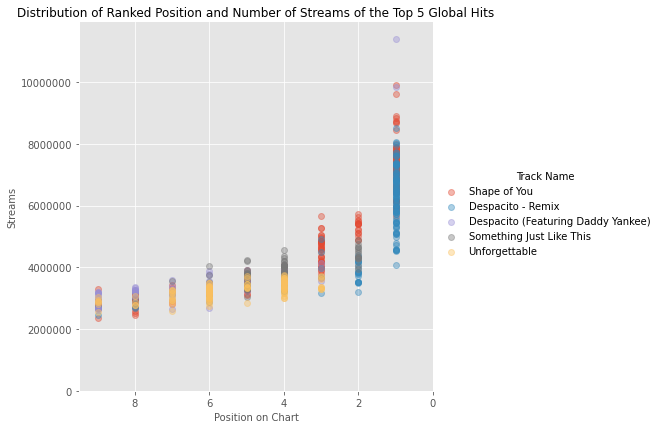

In [18]:
pos = GlobalDf['Position'] == 1
globalStreams=GlobalDf.groupby(['Track Name']).sum()
print(globalStreams.sort_values(by=['Streams'],ascending=False))

#songs that were no one globally
#Top_1_Tracks_Global = GlobalDf[pos]['Track Name'].drop_duplicates().reset_index(drop=True) 

#steams vs position for top global songs
#distrution of ranked position and number of streams of the top 5 global hits 
song1=GlobalDf[GlobalDf['Track Name'] == "Shape of You"]
song2=GlobalDf[GlobalDf['Track Name'] == "Despacito - Remix"]
song3=GlobalDf[GlobalDf['Track Name'] == "Despacito (Featuring Daddy Yankee)"]
song4=GlobalDf[GlobalDf['Track Name'] == "Something Just Like This"]
song5=GlobalDf[GlobalDf['Track Name'] == "Unforgettable"]
songs = [song1,song2,song3,song4,song5]
allsongs=pd.concat(songs)
sns.lmplot(x='Position',y='Streams',data=allsongs,hue='Track Name',fit_reg=False,height=6,scatter_kws={'alpha':0.4})
plt.ticklabel_format(style = 'plain')
plt.ylim(0,None)
plt.xlim(9.5, 0)
plt.xlabel("Position on Chart")
plt.title("Distribution of Ranked Position and Number of Streams of the Top 5 Global Hits")
#plt.show()
plt.savefig("DistributionPositionStreams.png",dpi=900,bbox_inches='tight')

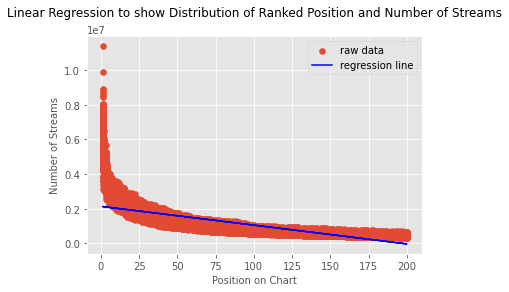

0.5990861819060338
1042190.5066681484
Root Mean Squared Error: 509165.88537564897


In [19]:
X = globalDataset['Position']
y = globalDataset['Streams']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)
# Importing Statsmodels.api library from Stamodel package
import statsmodels.api as sm
from sklearn import metrics
# Adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train)
# Fitting the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

# Printing the parameters
#print(lr.params)
#print(lr.summary())

plt.scatter(X_train, y_train,label="raw data")
plt.plot(X_train,  2.134e+06   + -1.084e+04 *X_train,'b',label="regression line")
plt.legend()
plt.xlabel("Position on Chart")
plt.ylabel("Number of Streams")
plt.title("Linear Regression to show Distribution of Ranked Position and Number of Streams",pad=20)
plt.savefig("LinearRegressionDistributionPositionStreams.png",dpi=900,bbox_inches='tight')
plt.show()

# Adding a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predicting the y values corresponding to X_test_sm
y_test_pred = lr.predict(X_test_sm)

# Importing r2_square
from sklearn.metrics import r2_score

# Checking the R-squared value
r_squared = r2_score(y_test, y_test_pred)
print(r_squared)
print(globalDataset['Streams'].mean())
print('Root Mean Squared Error:' , np.sqrt(metrics.mean_squared_error(y_test,y_test_pred)))


[-819870.8469209  4581073.85780413]
0.7561636424345501


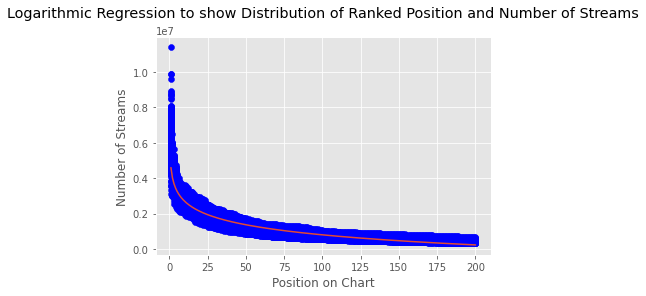

In [124]:
from scipy.optimize import curve_fit

fit = np.polyfit(np.log(globalDataset['Position']),globalDataset['Streams'] ,1)
print(fit)


x=globalDataset['Position'].sort_values(ascending=True)
plt.scatter(globalDataset['Position'],globalDataset['Streams'],c='b')
plt.plot(x,4581073.85780413 - 819870.8469209 * np.log(x))
plt.xlabel("Position on Chart")
plt.ylabel("Number of Streams")
plt.title("Logarithmic Regression to show Distribution of Ranked Position and Number of Streams",pad=20)
plt.savefig("LogRegDistOfPosAndStreams.png",dpi=900,bbox_inches='tight')

xdata = np.array([x])
ydata = np.array([globalDataset['Streams']])
ys = 4581073.85780413 - 819870.8469209 * np.log(xdata)

residuals = ydata - (4581073.85780413 - 819870.8469209 * np.log(xdata))
ssr = (residuals**2)
sst = (ydata**2)

r_sq = ssr.sum() / sst.sum()
print(r_sq)


0.3441043743868483


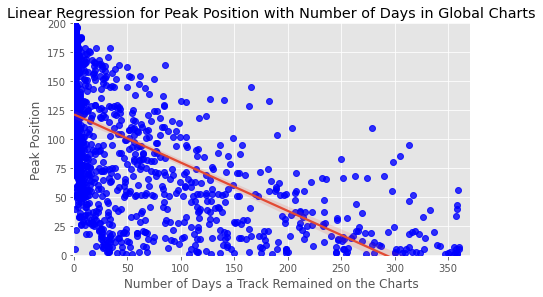

In [22]:
peak_positions=globalDataset.groupby(['Track Name']).min(['Position'])
peak_positions['days']=globalDataset['Track Name'].value_counts()

plt.style.use('ggplot')
sns.color_palette("Paired")
gridObj= sns.lmplot(x='days',y='Position',data=peak_positions,height=4,aspect=1.6,robust=True,
                    scatter_kws={'color':'blue'})

gridObj.set(xlim=(-.5,370),ylim=(-.5,200))
plt.title("Linear Regression for Peak Position with Number of Days in Global Charts")
plt.xlabel("Number of Days a Track Remained on the Charts")
plt.ylabel("Peak Position")
plt.savefig("LinearRegressionPeakPositionNumberDaysCharts.png",dpi=900,bbox_inches='tight')

from scipy.stats import linregress
linregress(peak_positions['days'],peak_positions['Position'])
#posDay=pd.merge(peak_positions,number_of_days)
#print(posDay)
r_2=-0.5866041036225781*-0.5866041036225781
print(r_2)

               Streams        days  order
pos                                      
1-10     656342.547738  164.943631    0.0
11-20    480927.420000  131.729722    1.0
21-30    493323.995595  114.309563    2.0
31-40    488257.658333  123.291667    3.0
41-50    508785.721905  103.845952    4.0
51-60    470436.406076   70.442128    5.0
61-70    460660.843651   66.549603    6.0
71-80    523156.310455   42.095303    7.0
81-90    480481.614206   37.655166    8.0
91-100   486798.162778   33.232302    9.0
101-110  500698.355631   33.777854   10.0
111-120  525466.101944   24.150278   11.0
121-130  483541.375714   20.178189   12.0
131-140  498158.789753   26.009890   13.0
141-150  519037.400476   13.277381   14.0
151-160  500444.064286   11.134524   15.0
161-170  500246.475641    7.754744   16.0
171-180  510128.615606    3.497045   17.0
181-190  485292.803030    1.791212   18.0
191-200  462878.989058    1.209419   19.0


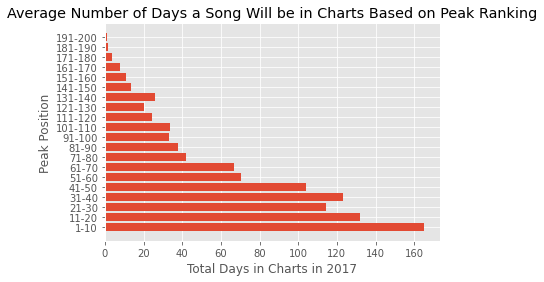

In [24]:
aver=peak_positions.groupby(['Position']).mean()
conditions=[(aver.index<=10),(aver.index>10) & (aver.index<=20),(aver.index>20) & (aver.index<=30),
           (aver.index>30) & (aver.index<=40),(aver.index>40) & (aver.index<=50),(aver.index>50) & (aver.index<=60),
           (aver.index>60) & (aver.index<=70),(aver.index>70) & (aver.index<=80),(aver.index>80) & (aver.index<=90),
           (aver.index>90) & (aver.index<=100),(aver.index>100) & (aver.index<=110),(aver.index>110) & (aver.index<=120),
           (aver.index>120) & (aver.index<=130),(aver.index>130) & (aver.index<=140),(aver.index>140) & (aver.index<=150),
           (aver.index>150) & (aver.index<=160),(aver.index>160) & (aver.index<=170),(aver.index>170) & (aver.index<=180),
           (aver.index>180) & (aver.index<=190),(aver.index>190) & (aver.index<=200)]
values=["1-10","11-20","21-30","31-40","41-50","51-60","61-70","71-80","81-90","91-100",
        "101-110","111-120","121-130","131-140","141-150","151-160","161-170","171-180","181-190","191-200"]
numbers= list(range(0,20))
aver['pos'] =np.select(conditions,values)
aver['order'] =np.select(conditions,numbers)
categories=aver.groupby('pos').mean()
categories=categories.sort_values(by='order',ascending=True)
print(categories)
#.sort_values(by='Streams',ascending=True)
#fig=plt.figure()
#ax=fig.add_axes([0,0,1,1])
#plt.bar(avg.index,avg['days'])
#widths=[d.num for d in np.diff(aver.index.tolist())]
plt.style.use('ggplot')

plt.barh(categories.index,categories['days'])
plt.title("Average Number of Days a Song Will be in Charts Based on Peak Ranking")
plt.ylabel("Peak Position")
plt.xlabel("Total Days in Charts in 2017")

plt.savefig("AverageDaysSongChartsBasedRanking.png",dpi=900,bbox_inches='tight')

#plt.plot(aver.index,aver.days)
#plt.show()

/tmp/ipykernel_30/785064482.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top20peak_pos['poisson'] = px


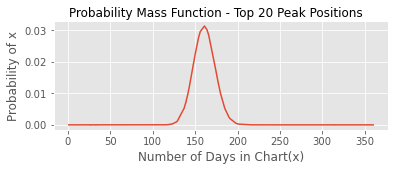

In [128]:
#pmf poisson on total days in charts and peak position
from scipy.stats import poisson
import scipy as sc

top20peak_pos = peak_positions[peak_positions.Position <= 20]
lam_20 = (top20peak_pos['days']).sum() / len(top20peak_pos)

px = []
for x in top20peak_pos['days']:
    px.append(sc.stats.poisson.pmf(x, lam_20))

top20peak_pos['poisson'] = px
#print(top20peak_pos.describe())

f, (graph) = plt.subplots(1)
f.set_size_inches(6,2)
f.suptitle('Probability Mass Function - Top 20 Peak Positions')
sns.lineplot(x = top20peak_pos['days'], y = top20peak_pos['poisson'], ax = graph)
graph.set_xlabel('Number of Days in Chart(x)')
graph.set_ylabel('Probability of x')

plt.savefig("PMFtop20.png",dpi=900,bbox_inches='tight')

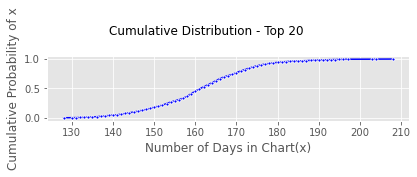

In [126]:
#cdf poisson on total days in charts and peak position
sample_poisson_top20 = np.random.poisson(lam_20, 1000)
sorted_sample_20 = np.sort(sample_poisson_top20)
cumulative_prob_20 = np.arange(1, len(sample_poisson_top20)+1)/len(sample_poisson_top20)

f, (graph) = plt.subplots(1)
f.set_size_inches(6,2)
f.suptitle('Cumulative Distribution - Top 20')
sns.lineplot(x = sorted_sample_20, y = cumulative_prob_20, ax = graph, marker = '.', color= 'blue')
graph.set_xlabel('Number of Days in Chart(x)')
graph.set_ylabel('Cumulative Probability of x')
plt.tight_layout()
plt.savefig("CDFtop20.png",dpi=900,bbox_inches='tight')

/tmp/ipykernel_30/1409388564.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  top20_40peak_pos = peak_positions[peak_positions.Position <= 40][peak_positions.Position >20]


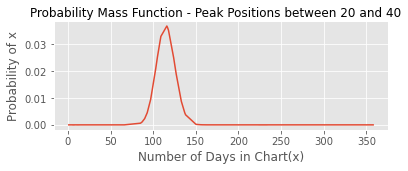

In [129]:
top20_40peak_pos = peak_positions[peak_positions.Position <= 40][peak_positions.Position >20]
lam_20_40 = (top20_40peak_pos['days']).sum() / len(top20_40peak_pos)

px = []
for x in top20_40peak_pos['days']:
    px.append(sc.stats.poisson.pmf(x, lam_20_40))

top20_40peak_pos['poisson'] = px
#print(top20_40peak_pos.describe())

f, (graph) = plt.subplots(1)
f.set_size_inches(6,2)
f.suptitle('Probability Mass Function - Peak Positions between 20 and 40')
sns.lineplot(x = top20_40peak_pos['days'], y = top20_40peak_pos['poisson'], ax = graph)
graph.set_xlabel('Number of Days in Chart(x)')
graph.set_ylabel('Probability of x')

plt.savefig("PMFTop40.png",dpi=900,bbox_inches='tight')

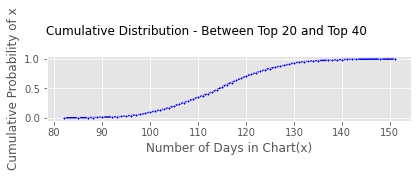

In [130]:
#cdf poisson on total days in charts and peak position
sample_poisson_top40 = np.random.poisson(lam_20_40, 1000)
sorted_sample_20_40 = np.sort(sample_poisson_top40)
cumulative_prob_20_40 = np.arange(1, len(sample_poisson_top40)+1)/len(sample_poisson_top40)

f, (graph) = plt.subplots(1)
f.set_size_inches(6,2)
f.suptitle('Cumulative Distribution - Between Top 20 and Top 40')
sns.lineplot(x = sorted_sample_20_40, y = cumulative_prob_20_40, ax = graph, marker = '.', color= 'blue')
graph.set_xlabel('Number of Days in Chart(x)')
graph.set_ylabel('Cumulative Probability of x')
plt.tight_layout()
plt.savefig("CDFtop40.png",dpi=900,bbox_inches='tight')

/tmp/ipykernel_30/1318184663.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  top40_60peak_pos = peak_positions[peak_positions.Position <= 60][peak_positions.Position >40]


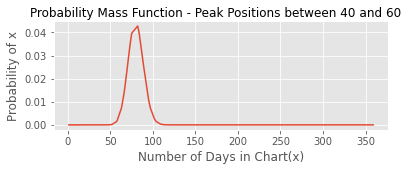

In [131]:
top40_60peak_pos = peak_positions[peak_positions.Position <= 60][peak_positions.Position >40]
lam_40_60 = (top40_60peak_pos['days']).sum() / len(top40_60peak_pos)

px = []
for x in top40_60peak_pos['days']:
    px.append(sc.stats.poisson.pmf(x, lam_40_60))

top40_60peak_pos['poisson'] = px
#print(top40_60peak_pos.describe())

f, (graph) = plt.subplots(1)
f.set_size_inches(6,2)
f.suptitle('Probability Mass Function - Peak Positions between 40 and 60')
sns.lineplot(x = top40_60peak_pos['days'], y = top40_60peak_pos['poisson'], ax = graph)
graph.set_xlabel('Number of Days in Chart(x)')
graph.set_ylabel('Probability of x')

plt.savefig("PMFTop60.png",dpi=900,bbox_inches='tight')

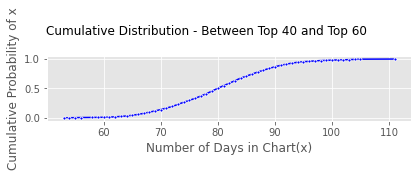

In [132]:
#cdf poisson on total days in charts and peak position
sample_poisson_top60 = np.random.poisson(lam_40_60, 1000)
sorted_sample_40_60 = np.sort(sample_poisson_top60)
cumulative_prob_40_60 = np.arange(1, len(sample_poisson_top60)+1)/len(sample_poisson_top60)

f, (graph) = plt.subplots(1)
f.set_size_inches(6,2)
f.suptitle('Cumulative Distribution - Between Top 40 and Top 60')
sns.lineplot(x = sorted_sample_40_60, y = cumulative_prob_40_60, ax = graph, marker = '.', color= 'blue')
graph.set_xlabel('Number of Days in Chart(x)')
graph.set_ylabel('Cumulative Probability of x')
plt.tight_layout()
plt.savefig("CDFtop60.png",dpi=900,bbox_inches='tight')

/tmp/ipykernel_30/1722356333.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  top60_80peak_pos = peak_positions[peak_positions.Position <= 80][peak_positions.Position >60]


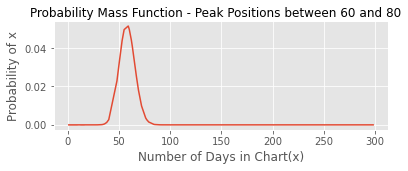

In [133]:
top60_80peak_pos = peak_positions[peak_positions.Position <= 80][peak_positions.Position >60]
lam_60_80 = (top60_80peak_pos['days']).sum() / len(top60_80peak_pos)

px = []
for x in top60_80peak_pos['days']:
    px.append(sc.stats.poisson.pmf(x, lam_60_80))

top60_80peak_pos['poisson'] = px
#print(top60_80peak_pos.describe())

f, (graph) = plt.subplots(1)
f.set_size_inches(6,2)
f.suptitle('Probability Mass Function - Peak Positions between 60 and 80')
sns.lineplot(x = top60_80peak_pos['days'], y = top60_80peak_pos['poisson'], ax = graph)
graph.set_xlabel('Number of Days in Chart(x)')
graph.set_ylabel('Probability of x')

plt.savefig("PMFTop80.png",dpi=900,bbox_inches='tight')

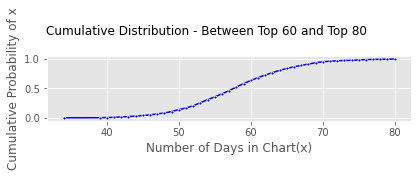

In [134]:
#cdf poisson on total days in charts and peak position
sample_poisson_top80 = np.random.poisson(lam_60_80, 1000)
sorted_sample_60_80 = np.sort(sample_poisson_top80)
cumulative_prob_60_80 = np.arange(1, len(sample_poisson_top80)+1)/len(sample_poisson_top80)

f, (graph) = plt.subplots(1)
f.set_size_inches(6,2)
f.suptitle('Cumulative Distribution - Between Top 60 and Top 80')
sns.lineplot(x = sorted_sample_60_80, y = cumulative_prob_60_80, ax = graph, marker = '.', color= 'blue')
graph.set_xlabel('Number of Days in Chart(x)')
graph.set_ylabel('Cumulative Probability of x')
plt.tight_layout()
plt.savefig("CDFtop80.png",dpi=900,bbox_inches='tight')

/tmp/ipykernel_30/62283293.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  top80_100peak_pos = peak_positions[peak_positions.Position <= 100][peak_positions.Position >80]


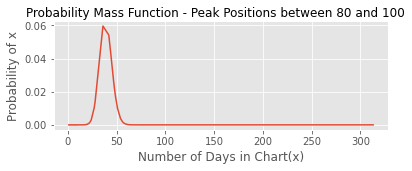

In [135]:
top80_100peak_pos = peak_positions[peak_positions.Position <= 100][peak_positions.Position >80]
lam_80_100 = (top80_100peak_pos['days']).sum() / len(top80_100peak_pos)

px = []
for x in top80_100peak_pos['days']:
    px.append(sc.stats.poisson.pmf(x, lam_80_100))

top80_100peak_pos['poisson'] = px
#print(top80_100peak_pos.describe())

f, (graph) = plt.subplots(1)
f.set_size_inches(6,2)
f.suptitle('Probability Mass Function - Peak Positions between 80 and 100')
sns.lineplot(x = top80_100peak_pos['days'], y = top80_100peak_pos['poisson'], ax = graph)
graph.set_xlabel('Number of Days in Chart(x)')
graph.set_ylabel('Probability of x')

plt.savefig("PMFTop100.png",dpi=900,bbox_inches='tight')

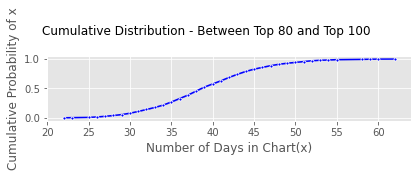

In [136]:
#cdf poisson on total days in charts and peak position
sample_poisson_top100 = np.random.poisson(lam_80_100, 1000)
sorted_sample_80_100 = np.sort(sample_poisson_top100)
cumulative_prob_80_100 = np.arange(1, len(sample_poisson_top100)+1)/len(sample_poisson_top100)

f, (graph) = plt.subplots(1)
f.set_size_inches(6,2)
f.suptitle('Cumulative Distribution - Between Top 80 and Top 100')
sns.lineplot(x = sorted_sample_80_100, y = cumulative_prob_80_100, ax = graph, marker = '.', color= 'blue')
graph.set_xlabel('Number of Days in Chart(x)')
graph.set_ylabel('Cumulative Probability of x')
plt.tight_layout()
plt.savefig("CDFtop100.png",dpi=900,bbox_inches='tight')

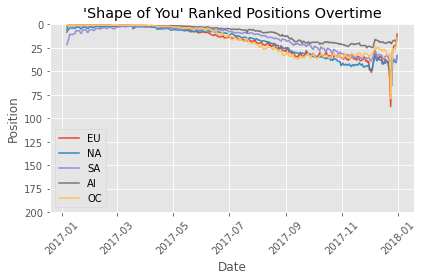

In [35]:
sns.lineplot(data=EuropeDf[EuropeDf['Track Name']=="Shape of You"],x = 'Date',y='Position',label="EU", ci=None)
sns.lineplot(data=NorthAmericaDf[NorthAmericaDf['Track Name']=="Shape of You"],x = 'Date',y='Position',label="NA", ci=None)
sns.lineplot(data=SouthAmericaDf[SouthAmericaDf['Track Name']=="Shape of You"],x = 'Date',y='Position',label="SA", ci=None)
sns.lineplot(data=AsiaDf[AsiaDf['Track Name']=="Shape of You"],x = 'Date',y='Position',label="AI", ci=None)
sns.lineplot(data=OceaniaDf[OceaniaDf['Track Name']=="Shape of You"],x = 'Date',y='Position',label="OC", ci=None)
plt.ylim(200,-1)
plt.legend()
plt.title("'Shape of You' Ranked Positions Overtime")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("ShapeofYouPositions.png",dpi=900,bbox_inches='tight')

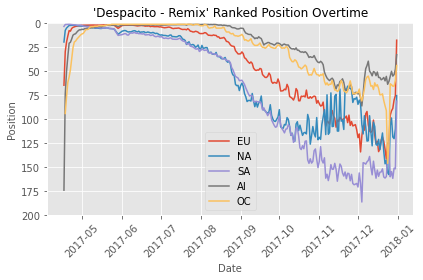

In [34]:
sns.lineplot(data=EuropeDf[EuropeDf['Track Name']=="Despacito - Remix"],x = 'Date',y='Position',label="EU", ci=None)
sns.lineplot(data=NorthAmericaDf[NorthAmericaDf['Track Name']=="Despacito - Remix"],x = 'Date',y='Position',label="NA", ci=None)
sns.lineplot(data=SouthAmericaDf[SouthAmericaDf['Track Name']=="Despacito - Remix"],x = 'Date',y='Position',label="SA", ci=None)
sns.lineplot(data=AsiaDf[AsiaDf['Track Name']=="Despacito - Remix"],x = 'Date',y='Position',label="AI", ci=None)
sns.lineplot(data=OceaniaDf[OceaniaDf['Track Name']=="Despacito - Remix"],x = 'Date',y='Position',label="OC", ci=None)
plt.ylim(200,-1)
plt.legend()
plt.xticks(rotation=45)
plt.title("'Despacito - Remix' Ranked Position Overtime")
plt.tight_layout()
plt.savefig("DespacitoRemixPositions.png",dpi=900,bbox_inches='tight')
#spikes again in december- sime songs spike after spotify wrapped

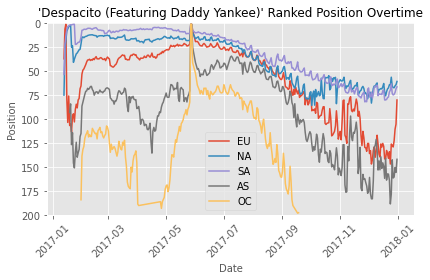

In [35]:
sns.lineplot(data=EuropeDf[EuropeDf['Track Name']=="Despacito (Featuring Daddy Yankee)"],x = 'Date',y='Position',label="EU", ci=None)
sns.lineplot(data=NorthAmericaDf[NorthAmericaDf['Track Name']=="Despacito (Featuring Daddy Yankee)"],x = 'Date',y='Position',label="NA", ci=None)
sns.lineplot(data=SouthAmericaDf[SouthAmericaDf['Track Name']=="Despacito (Featuring Daddy Yankee)"],x = 'Date',y='Position',label="SA", ci=None)
sns.lineplot(data=AsiaDf[AsiaDf['Track Name']=="Despacito (Featuring Daddy Yankee)"],x = 'Date',y='Position',label="AS", ci=None)
sns.lineplot(data=OceaniaDf[OceaniaDf['Track Name']=="Despacito (Featuring Daddy Yankee)"],x = 'Date',y='Position',label="OC", ci=None)
plt.ylim(200,-1)
plt.title("'Despacito (Featuring Daddy Yankee)' Ranked Position Overtime")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("DespacitoDaddyYankeePositions.png",dpi=900,bbox_inches='tight')

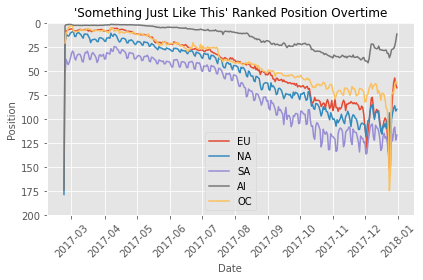

In [36]:
sns.lineplot(data=EuropeDf[EuropeDf['Track Name']=="Something Just Like This"],x = 'Date',y='Position',label="EU", ci=None)
sns.lineplot(data=NorthAmericaDf[NorthAmericaDf['Track Name']=="Something Just Like This"],x = 'Date',y='Position',label="NA", ci=None)
sns.lineplot(data=SouthAmericaDf[SouthAmericaDf['Track Name']=="Something Just Like This"],x = 'Date',y='Position',label="SA", ci=None)
sns.lineplot(data=AsiaDf[AsiaDf['Track Name']=="Something Just Like This"],x = 'Date',y='Position',label="AI", ci=None)
sns.lineplot(data=OceaniaDf[OceaniaDf['Track Name']=="Something Just Like This"],x = 'Date',y='Position',label="OC", ci=None)
plt.ylim(200,-1)
plt.title("'Something Just Like This' Ranked Position Overtime")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("SomethingLikeThisPosition.png",dpi=900,bbox_inches='tight')

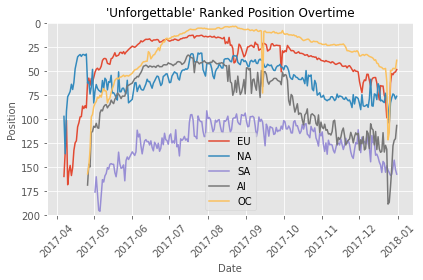

In [37]:
sns.lineplot(data=EuropeDf[EuropeDf['Track Name']=="Unforgettable"],x = 'Date',y='Position',label="EU", ci=None)
sns.lineplot(data=NorthAmericaDf[NorthAmericaDf['Track Name']=="Unforgettable"],x = 'Date',y='Position',label="NA", ci=None)
sns.lineplot(data=SouthAmericaDf[SouthAmericaDf['Track Name']=="Unforgettable"],x = 'Date',y='Position',label="SA", ci=None)
sns.lineplot(data=AsiaDf[AsiaDf['Track Name']=="Unforgettable"],x = 'Date',y='Position',label="AI", ci=None)
sns.lineplot(data=OceaniaDf[OceaniaDf['Track Name']=="Unforgettable"],x = 'Date',y='Position',label="OC", ci=None)
plt.ylim(200,-1)
plt.title("'Unforgettable' Ranked Position Overtime")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("UnforgettablePosition.png",dpi=900,bbox_inches='tight')

In [ ]:
artists_by_streams = dataset.groupby('Artist')['Streams'].sum()
artists_by_streams.sort_values(ascending=False, inplace=True)
top10 = artists_by_streams.iloc[:10]
top10

plt.figure(figsize=(10,5))
plt.title('Most Streamed Artists on Spotify in 2017')
plt.bar(x=top10.index, height=top10)
plt.xticks(rotation=45)
plt.xlabel("Artists")
plt.ylabel("Streams")
plt.tight_layout()
plt.savefig("MostStreamedArtists.png")

In [ ]:
dataset['day_of_week'] = dataset['Date'].dt.dayofweek
dataset['month'] = dataset['Date'].dt.month_name()

In [ ]:
sums = dataset.groupby('day_of_week')['Streams'].sum()
print(sums)
ax = sns.barplot(x=sums.index, y=sums.values, alpha=.7)
plt.style.use('ggplot')
plt.xticks(np.arange(7), ['M','T','W','Th','F','S','Su'], rotation=0, fontsize=12)
plt.xlabel('Day of Week')
plt.ylabel('Streams')
plt.title('2017 Global Streams by Day of the Week', fontsize=14, ha='center',pad=20)
plt.savefig('2017GlobalStreamsDay.png')

In [ ]:
sns.set_style()

fig, ax = plt.subplots(1, 1, figsize=(6,3), dpi=100)
fig.suptitle('2017 Global Streams by Month of Year', fontsize=14, ha='center')

sums = dataset.groupby('month')['Streams'].sum()
print(sums)
ax = sns.barplot(x=sums.index, y=sums.values, palette="plasma", alpha=.7)
#plt.yticks(np.arange(10**10,(4.5*10**10), (10**10)), ['1 Billion', '2 Billion', '3 Billion'], rotation=0, fontsize=12)
plt.xticks(np.arange(12), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], rotation=0, fontsize=12)
plt.xlabel('')
plt.show()

In [137]:
#days in number one spot for global no1s
Position = GlobalDf['Position'] == 1
Top_1_Tracks_Global = GlobalDf[Position]['Track Name'].drop_duplicates().reset_index(drop=True)
song_names=list()
days_in_top_1=list()

for n in range(len(Top_1_Tracks_Global)):
    song_names.append(str(Top_1_Tracks_Global[n]))
    Name     = GlobalDf['Track Name'] == song_names[n]
    days_in_top_1.append(len([Position & Name]))

    

In [49]:
#top songs globally on dec 25th
xmas_df = globalDataset.loc[(globalDataset['Date'] == '2017-12-25')]
xmas_df.head()

,Position,Track Name,Artist,Streams,Date,Region
3187243,1,All I Want for Christmas Is You,Mariah Carey,6467590,2017-12-25,global
3187244,2,Last Christmas,Wham!,5122502,2017-12-25,global
3187245,3,Do They Know It's Christmas? - 1984 Version,Band Aid,3699892,2017-12-25,global
3187246,4,Rockin' Around The Christmas Tree - Single Ver...,Brenda Lee,3589792,2017-12-25,global
3187247,5,rockstar,Post Malone,3552559,2017-12-25,global
